### Import the libraries

In [8]:
import numpy as np
import pandas as pd 
import rasterio
import pyproj
from rasterio.windows import from_bounds
from rasterio.plot import show
from rasterio.windows import Window
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

### Load the dataset

In [9]:
img = rasterio.open('/Users/nicolasdemuynck/BeCode/Github/finalchallenge/tif files finalchallenge/DHMVIIDSMRAS1m_k13.tif')

### Look at the details

In [6]:
print(img.count) # shows the amount of bands
print(img.bounds) # shows the boundaries of the image
print(img.height) # shows the width
print(img.width) # shows the height
print(img.crs) # shows the coordinate system

1
BoundingBox(left=66000.0, bottom=198000.0, right=98000.0, top=218000.0)
20000
32000
LOCAL_CS["Belge 1972 / Belgian Lambert 72",GEOGCS["Belge 1972",DATUM["unknown",SPHEROID["unretrievable - using WGS84",6378137,298.257223563],TOWGS84[-106.869,52.2978,-103.724,0.3366,-0.457,1.8422,-1.2747]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],AUTHORITY["EPSG","31370"],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]


### Transform the coordinates into Belgian Lambert 72

In [15]:
transformer = pyproj.Transformer.from_crs('epsg:4326', 'epsg:31370')
transformer.transform(51.208833, 3.224316) # input: Latitude, Longitude // output: X and Y

(70025.90002837365, 211601.3606486339)

### Make a window

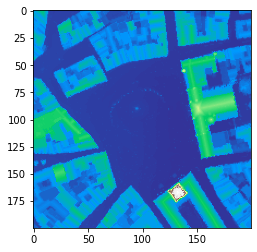

In [17]:
x_coor = 70025.90002837365
y_coor = 211601.3606486339

left = x_coor - 100
right = x_coor + 100
bottom = y_coor - 100
top = y_coor + 100

coor_map = img.read(1, window=from_bounds(left, bottom, right, top, img.transform))

rasterio.plot.show (coor_map, cmap = 'terrain')

plt.show ()

### Transform variable from numpy ndarray to dataframe

In [19]:
print(coor_map.shape)
print (type(coor_map))

dataframe = pd.DataFrame(coor_map)
print(dataframe.shape)
print (type(dataframe))

(200, 200)
<class 'numpy.ndarray'>
(200, 200)
<class 'pandas.core.frame.DataFrame'>


### Extracting the 3D coordinates

In [24]:
#x = np.arange(len(dataframe.columns))
x = dataframe.columns # array of x- values
y = dataframe.index # array of y- values

X,Y = np.meshgrid(x,y) # create a rectangular grid out of an array of x- and y- values.
Z = dataframe

### 3D plot with Matplotlib

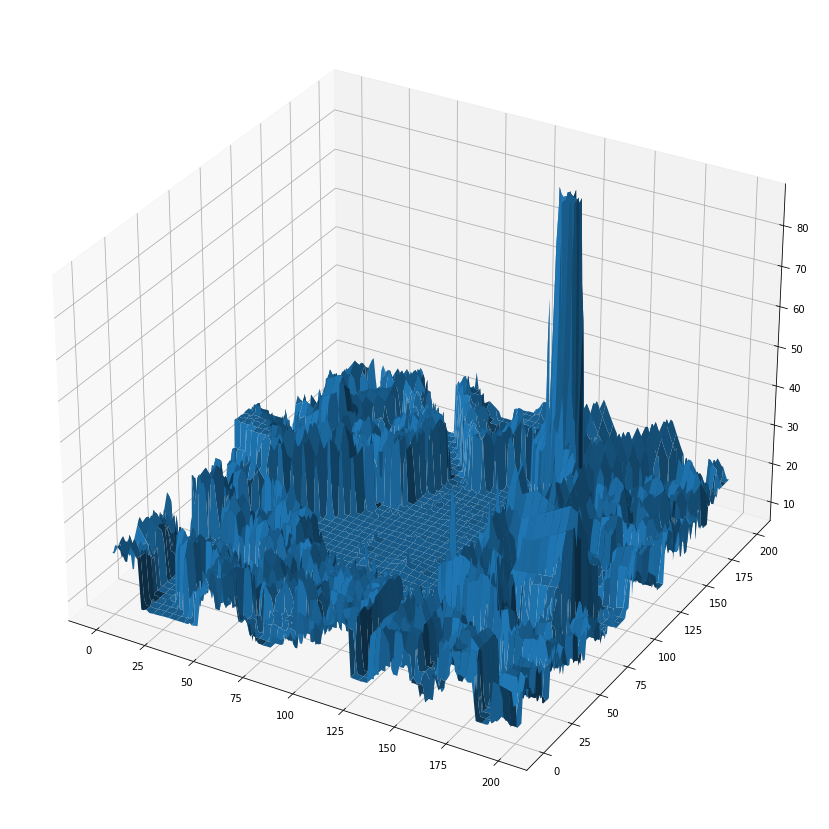

In [25]:
fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

plt.show ()

### 3D plot with Plotly

In [30]:
fig = go.Figure(data=[go.Surface(z=dataframe.values)])
fig.update_layout(title = 'Markt van Brugge', autosize = False, width = 1000, height = 1000)

fig.show()